# 批量梯度下降①

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']='SimHei'

x = [(1,0.,3) , (1,1.,3) ,(1,2.,3), (1,3.,2) , (1,4.,4)]
y = [95.364,97.217205,75.195834,60.105519,49.342380]
my_break=0.00001
alpha=0.01
diff=0
error1,error0=0,0
theta0,theta1,theta2=0,0,0
sum0,sum1,sum2=0,0,0
count = 0
result1 = []
while True:
    for i in range(len(x)):
        #批量更新参数
        diff=y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2])
        sum0=sum0+alpha*diff*x[i][0]
        sum1=sum1+alpha*diff*x[i][1]
        sum2=sum2+alpha*diff*x[i][2]
        count+=1
    theta0,theta1,theta2=sum0,sum1,sum2
    error1=0
    for i in range(len(x)):
        error1+=(y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2]))**2/2
        count+=1
    result1.append(abs(error1-error0))
    if abs(error1-error0)<my_break:
        break
    else:
        error0=error1
print("Done: \ntheta0:{0}, \ntheta1:{1}, \ntheta2:{2}.".format(theta0,theta1,theta2))

Done: 
theta0:97.94785514339736, 
theta1:-13.027668348416297, 
theta2:1.182150388413143.


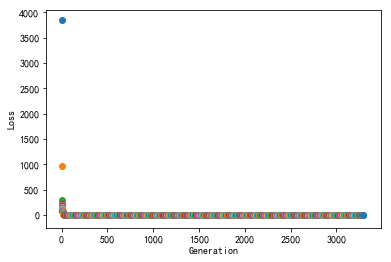

In [4]:
for i in range(len(result1)):
    plt.scatter(i,result1[i])
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.show()

# 批量梯度下降②

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,2,3,4,5,6]
y = [13,14,20,21,25,30] 
alpha = 0.01#学习率
k0 = 0
k1 = 0
epsilon = 0.001#误差
count = 0
m = len(x)
result_tj = []
while True:
    temp0 = 0
    temp1 = 0
    for i in range(m):
        temp0 += (k0 + k1*x[i] - y[i]) / m
        temp1 += (k0 + k1*x[i] - y[i]) * x[i] / m
    temp0 = k0 - alpha * temp0
    temp1 = k1 - alpha * temp1
    k0 = temp0
    k1 = temp1

    loss =0

    for j in range(m):
        loss += 0.5/m * (k0 + k1*x[i] - y[i])**2
    count += 1
    result_tj.append(loss)
    print('k0:{},k1:{},loss:{},count:{}'.format(k0,k1,loss,count))
   
    if(loss < epsilon):
        break

k0:0.20500000000000002,k1:0.8166666666666668,loss:309.8805125,count:1
k0:0.3793666666666667,k1:1.5022972222222224,loss:212.32113346125004,count:2
k0:0.5279925972222222,k1:2.0778376435185186,loss:144.58469861621202,count:3
k0:0.6549883537268518,k1:2.560885860015432,loss:97.71595692286448,count:4
k0:0.7638074650890432,k1:2.9662269121993186,loss:65.42342802922845,count:5
k0:0.8573514485111766,k1:3.3062825692376387,loss:43.29107643216421,count:6
k0:0.9380580441027475,k1:3.591489078872039,loss:28.222640717290297,count:7
k0:1.0079753459011986,k1:3.83061453703285,loss:18.050059347795585,count:8
k0:1.068824083646037,k1:4.0310255284763254,loss:11.257620427637239,count:9
k0:1.1220499493129052,k1:4.198911147063138,loss:6.787708108773455,count:10
k0:1.1688675596725664,k1:4.339471208199277,loss:3.904070750592987,count:11
k0:1.210297391788866,k1:4.457074377033847,loss:2.095629273135119,count:12
k0:1.2471968146747927,k1:4.55539102113777,loss:1.0088491275192255,count:13
k0:1.2802861607882228,k1:4.6375

[10.007869958201418, 14.015004833447499, 18.022139708693583, 22.029274583939664, 26.036409459185744, 30.04354433443183]


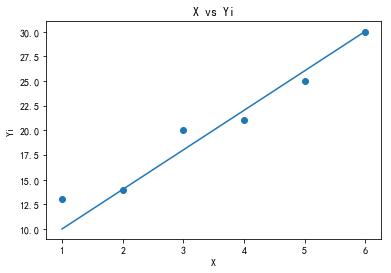

In [18]:
#求拟合曲线的y值并输出
yi = []
for i in range(len(x)):
    yc = 0
    yc = k0 + k1*x[i]
    yi.append(yc)
print(yi)

#绘制起始数据的散点图与拟合曲线的图像在同一图中
plt.scatter(x,y)
plt.plot(x,yi)
plt.xlabel("X")
plt.ylabel("Yi")
plt.title("X vs Yi")
plt.show()

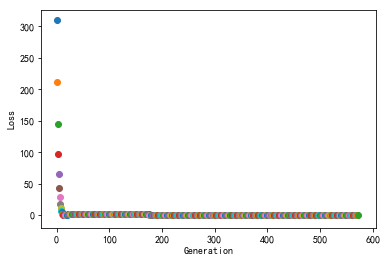

In [20]:
for m in range(count):
    plt.scatter(m,result_tj[m])
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.show()

# 随机梯度下降

In [6]:
x = [(1,0.,3) , (1,1.,3) ,(1,2.,3), (1,3.,2) , (1,4.,4)]
y = [95.364,97.217205,75.195834,60.105519,49.342380]
my_break=0.00001
alpha=0.01
diff=0
error1,error0=0,0
theta0,theta1,theta2=0,0,0
sum0,sum1,sum2=0,0,0
min_x=2
result2 = []
while True:
    for i in range(len(x)):
        #迭代内参数被单次样本迭代进行更新
        diff=y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2])
        theta0=theta0+alpha*diff*x[i][0]
        theta1=theta1+alpha*diff*x[i][1]
        theta2=theta2+alpha*diff*x[i][2]
        count+=1
    error1=0
    for i in range(len(x)):
        error1+=(y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2]))**2/2
        count+=1
    result2.append(abs(error1-error0))
    if abs(error1-error0)<my_break:
        break
    else:
        error0=error1
print("Done: \ntheta0:{0}, \ntheta1:{1}, \ntheta2:{2}.".format(theta0,theta1,theta2))

Done: 
theta0:97.98580967621673, 
theta1:-13.221178363760062, 
theta2:1.2574433421325766.


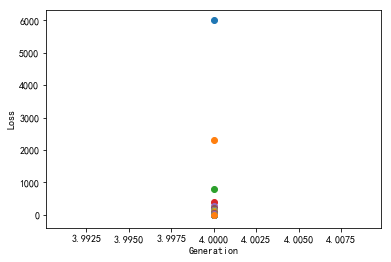

In [7]:
for j in range(len(result2)):
    plt.scatter(i,result2[j])
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.show()

# 小批量随机下降 

In [8]:
x = [(1,0.,3) , (1,1.,3) ,(1,2.,3), (1,3.,2) , (1,4.,4)]
y = [95.364,97.217205,75.195834,60.105519,49.342380]
my_break=0.00001
alpha=0.01
diff=0
error1,error0=0,0
theta0,theta1,theta2=0,0,0
sum0,sum1,sum2=0,0,0
count=0
min_x=2
result3 = []
while True:
    count_x=0
    for i in range(len(x)):
        diff=y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2])
        sum0=sum0+alpha*diff*x[i][0]
        sum1=sum1+alpha*diff*x[i][1]
        sum2=sum2+alpha*diff*x[i][2]
        count_x+=1
        #在迭代内部小批量迭代更新参数
        if count_x%min_x==0:
            theta0,theta1,theta2=sum0,sum1,sum2
        count+=1

    error1=0
    for i in range(len(x)):
        error1+=(y[i]-(theta0*x[i][0]+theta1*x[i][1]+theta2*x[i][2]))**2/2
        count+=1
    result3.append(abs(error1-error0))
    if abs(error1-error0)<my_break:
        break
    else:
        error0=error1
print("Done: \ntheta0:{0}, \ntheta1:{1}, \ntheta2:{2}.".format(theta0,theta1,theta2))

Done: 
theta0:97.6682684654781, 
theta1:-13.060751793966089, 
theta2:1.2717153241099328.


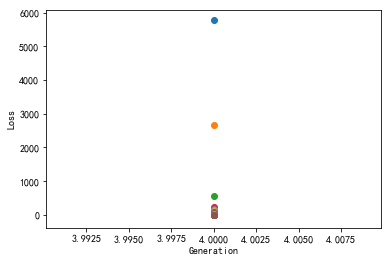

In [9]:
for k in range(len(result3)):
    plt.scatter(i,result3[k])
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.show()